In [5]:
# Import libraries for data processing and model building
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [10]:
# Set up data augmentation and data loaders
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,      # Normalize pixel values
    validation_split=0.25,     # 25% of images for validation
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define directories for training and validation
train_data = datagen.flow_from_directory(
    "D:/IIP Project/Dataset",                    # path to main data directory
    target_size=(150, 150),    # resize all images to 150x150
    batch_size=32,
    class_mode='categorical',  # for multi-class classification
    subset='training'
)

val_data = datagen.flow_from_directory(
    "D:/IIP Project/Dataset",                    # path to main data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 771 images belonging to 4 classes.
Found 256 images belonging to 4 classes.


In [16]:
# Print information about class indices and data shape
print("Class Indices:", train_data.class_indices)
print("Number of classes:", len(train_data.class_indices))

# Display the number of images in training and validation sets
print("Total training images:", train_data.samples)
print("Total validation images:", val_data.samples)


Class Indices: {'Fog': 0, 'Rain': 1, 'Sand': 2, 'Snow': 3}
Number of classes: 4
Total training images: 771
Total validation images: 256


In [17]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes for sand, snow, rain, fog
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 961ms/step - accuracy: 0.7276 - loss: 0.6567 - val_accuracy: 0.7422 - val_loss: 0.7085
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 897ms/step - accuracy: 0.7124 - loss: 0.7319 - val_accuracy: 0.7695 - val_loss: 0.6463
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 806ms/step - accuracy: 0.7418 - loss: 0.6772 - val_accuracy: 0.7188 - val_loss: 0.7195
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 836ms/step - accuracy: 0.7181 - loss: 0.7144 - val_accuracy: 0.6719 - val_loss: 0.7309
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 823ms/step - accuracy: 0.7096 - loss: 0.7443 - val_accuracy: 0.7383 - val_loss: 0.6244
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 812ms/step - accuracy: 0.7509 - loss: 0.6314 - val_accuracy: 0.7305 - val_loss: 0.6416
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 827ms/step - accuracy: 0.7358 - loss: 0.6846 - val_accuracy: 0.6992 - val_loss: 0.6937
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 827ms/step - accuracy: 0.7354 - loss: 0.6706 - val_accu

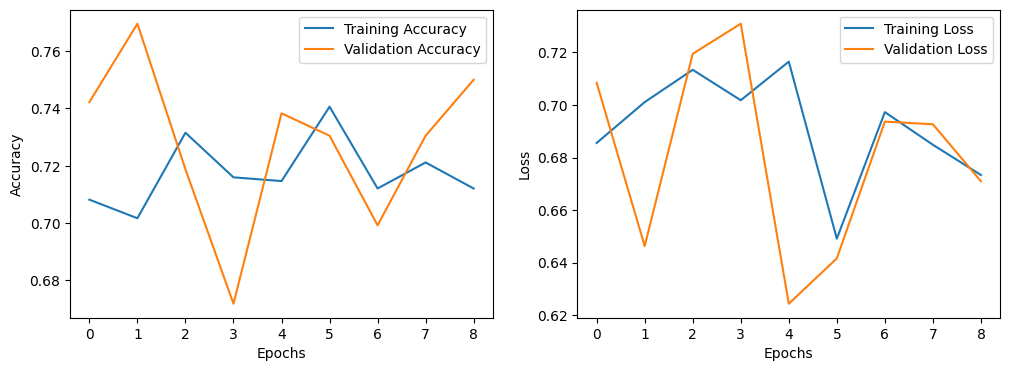

In [23]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [28]:
# Save the trained model
model.save('weather_classifier.keras')

# Save class labels as a dictionary
label_map = train_data.class_indices
import json
with open('label_map.json', 'w') as file:
    json.dump(label_map, file)

    
print("Saved successfully!")

Saved successfully!


# Testing

In [37]:
# Load model and label map for testing
from tensorflow.keras.models import load_model
import json

model = load_model('weather_classifier.keras')
with open('label_map.json', 'r') as file:
    label_map = json.load(file)
inv_label_map = {v: k for k, v in label_map.items()}  # Reverse label map

def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    # Format the output message
    result_message = f"The picture you provided represents \033[1m{inv_label_map[predicted_class]}\033[0m"
    return result_message

# Test the function with a sample image
print(predict_image("D:/IIP Project/Dataset/Snow/snow_storm-084.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
The picture you provided represents Snow
